#Alzheimer's Predictive Analytics

##Group 1:

Teja Swaroop Sayya,
Venkata Kiran karnam,
Ramesh Venkat Reddy Konda,
Ruchitha Reddy Katta,
Rohith Reddy Alla.

###Project Introduction:
This project aims to analyze the Alzheimer's disease dataset to identify factors associated with the diagnosis. The dataset contains demographic, lifestyle, and behavioral characteristics of patients. The goal is to develop a predictive model to identify the likelihood of an Alzheimer's disease diagnosis. This project will use supervised learning with a target variable (Diagnosis) and employ classification methods.

###Research Question:



How do factors like alcohol consumption, age, ethnic background, and medical history affect the risk of developing Alzheimer's disease? Can these variables be used to create a model that identifies individuals at high risk for the condition? What potential benefits could such a model offer for early intervention and care?

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')

alz=pd.read_csv('alzheimers_disease_data.csv')
print(alz.head())
# alz.head()

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                     

Research Question:

In [89]:
alz

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [90]:
alz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

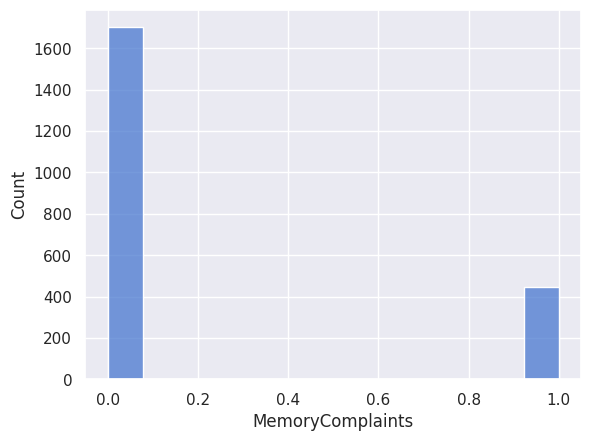

In [91]:
sns.histplot(alz["MemoryComplaints"])
plt.show()

In [92]:
alz.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


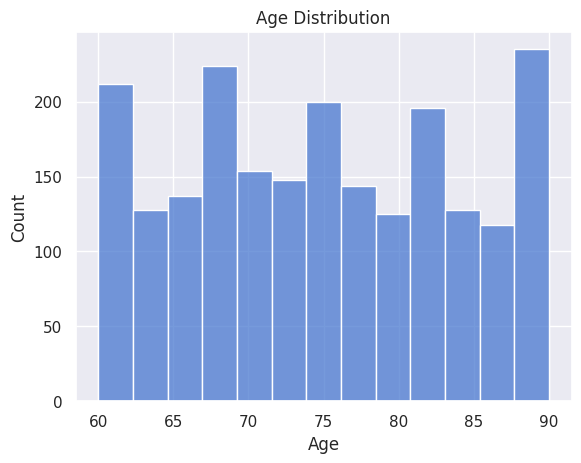

In [93]:
#Age Distribution
sns.histplot(alz['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

###Data Preprocessing
Drop the PatientID and DoctorInCharge columns as they are not relevant to the analysis.
Convert the Gender and Ethnicity columns to categorical variables.
Scale the Age, BMI, AlcoholConsumption, PhysicalActivity, and DietQuality columns using Standard Scaler.
Encode the EducationLevel column using Label Encoder.

In [94]:
alz.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [95]:
numerical_columns = [col for col in alz.columns if alz[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = alz.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

In [96]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# Convert categorical variables
alz['Gender'] = alz['Gender'].astype('category')
alz['Ethnicity'] = alz['Ethnicity'].astype('category')

# Scale numerical columns
scaler = StandardScaler()
alz[['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality']] = scaler.fit_transform(alz[['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality']])

# Encode EducationLevel
le = LabelEncoder()
alz['EducationLevel'] = le.fit_transform(alz['EducationLevel'])

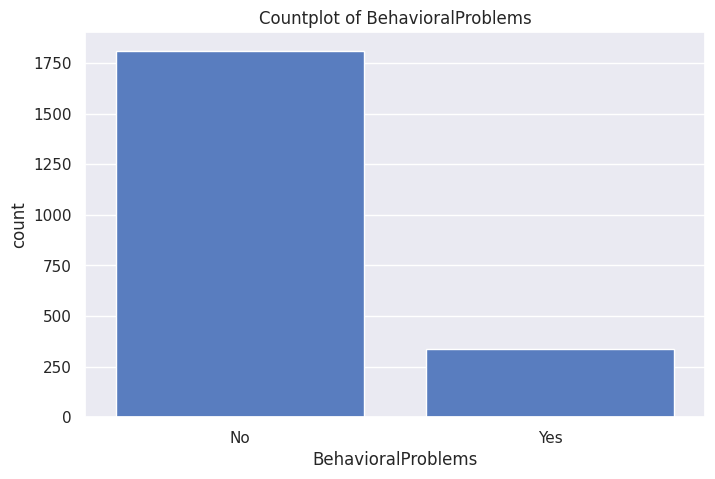

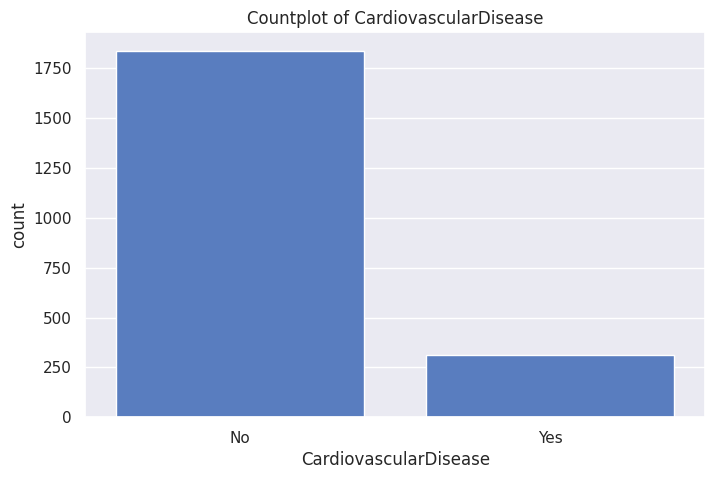

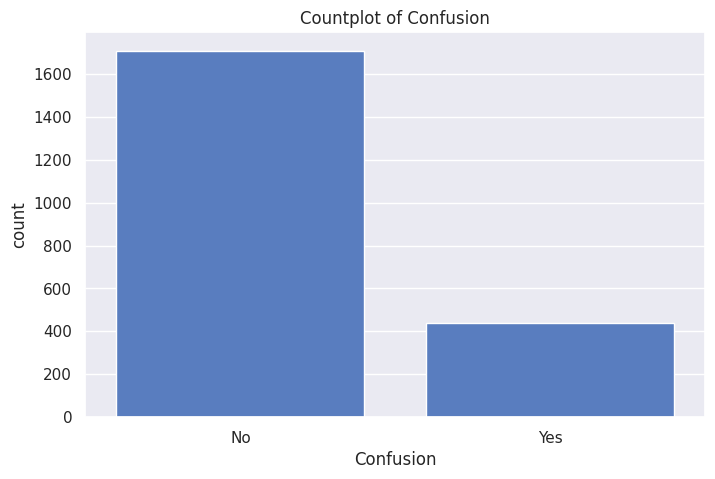

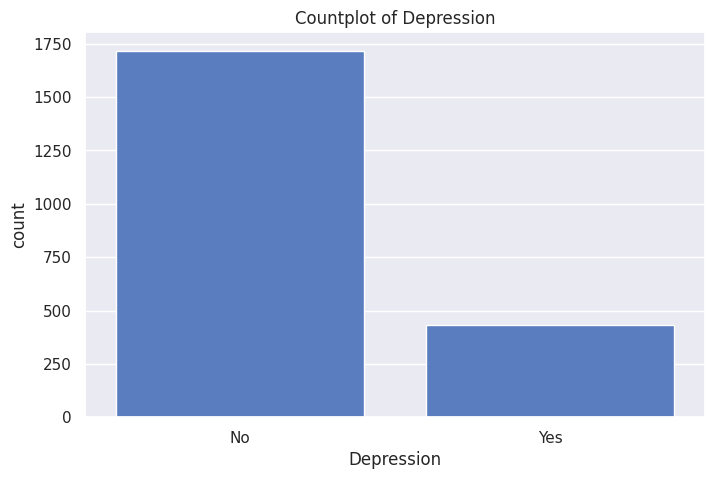

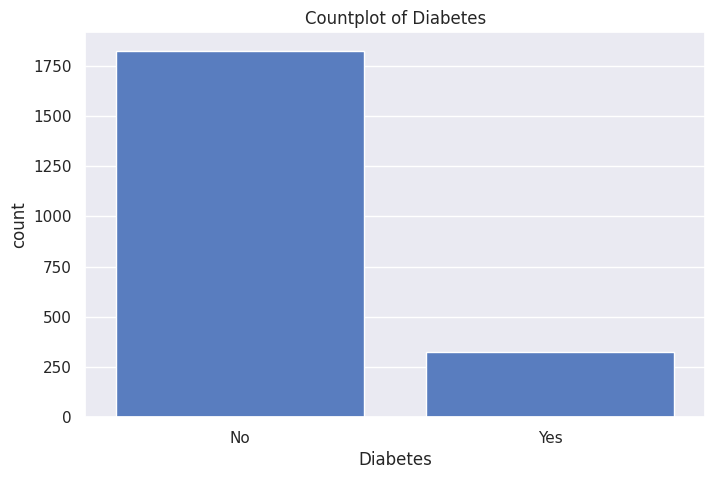

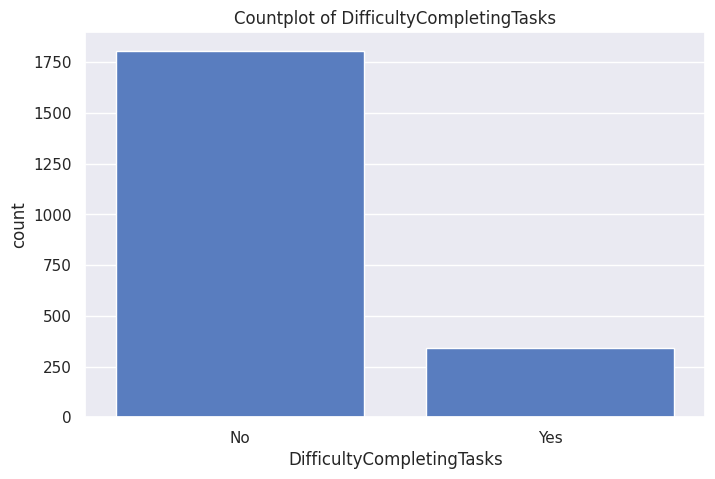

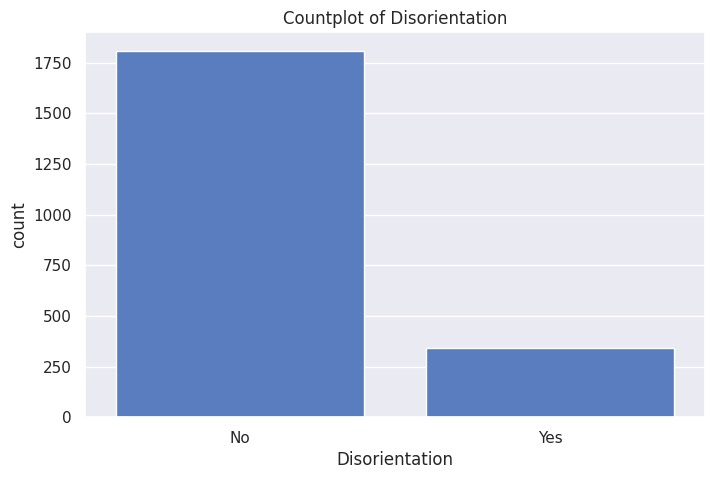

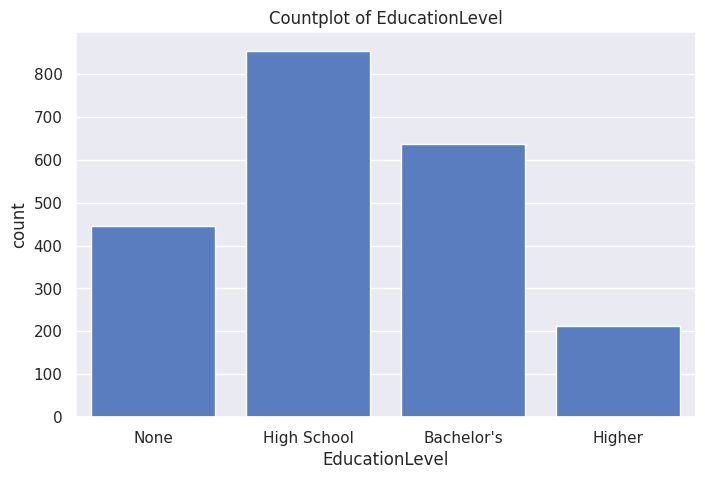

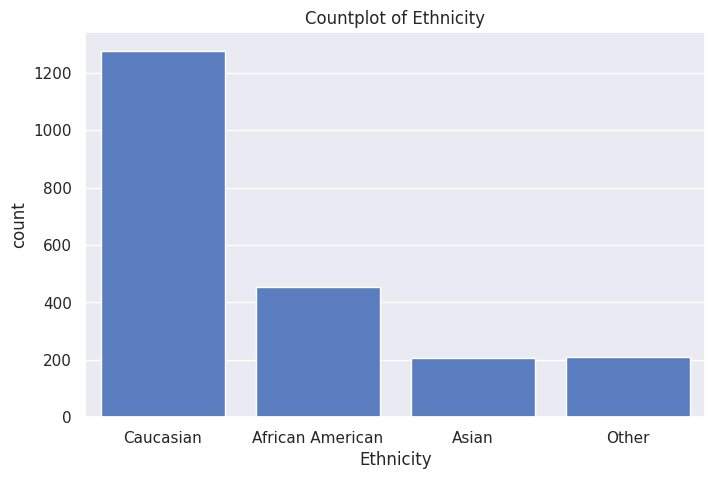

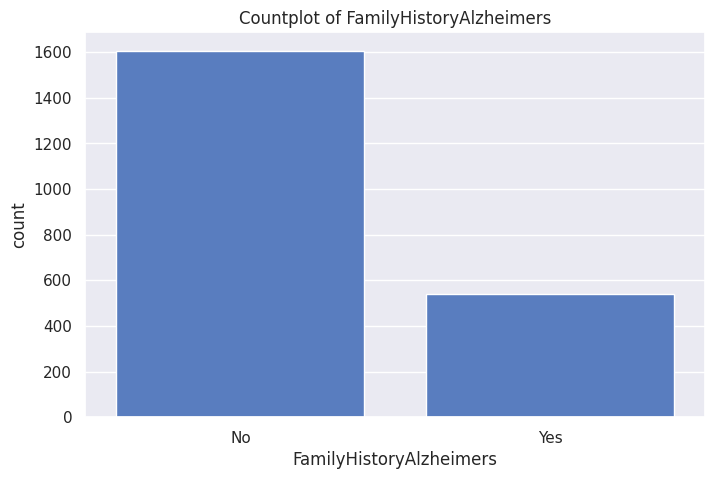

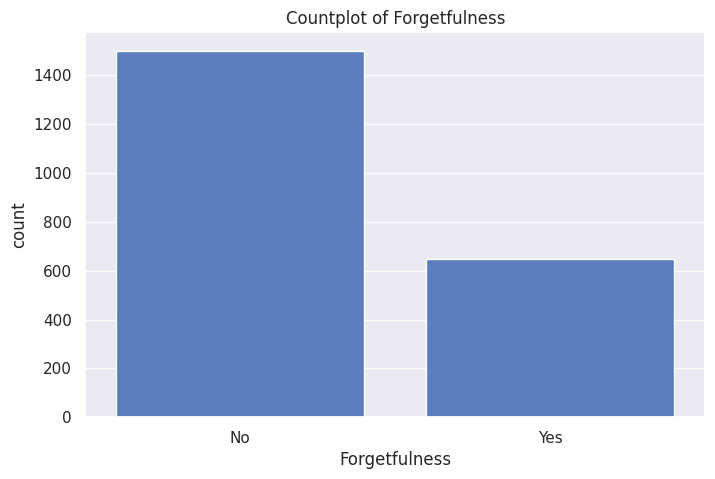

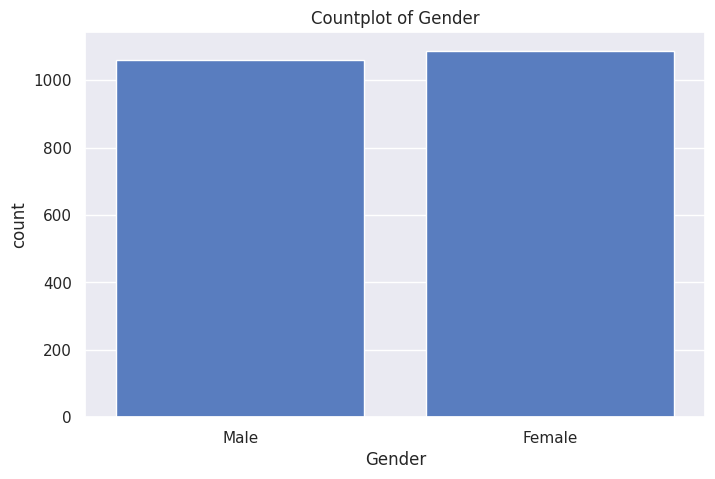

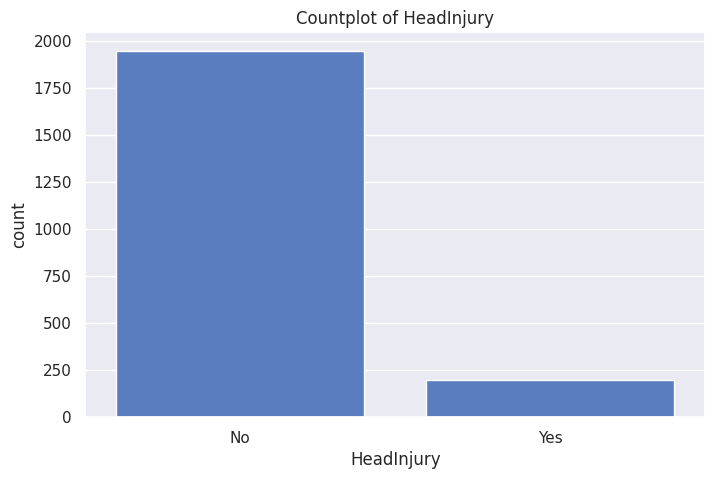

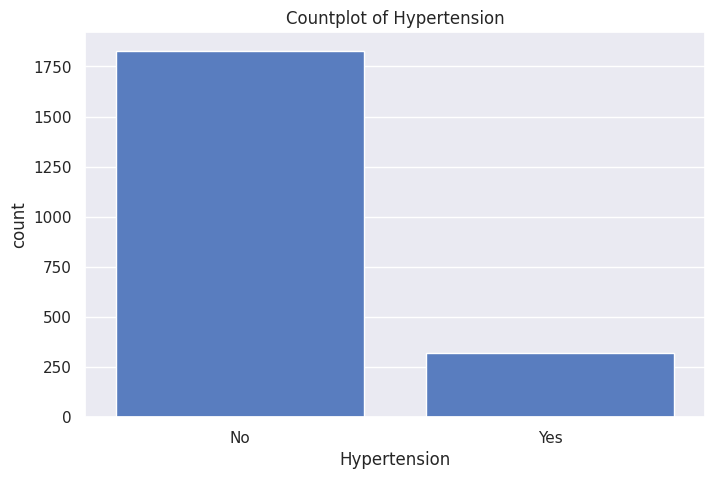

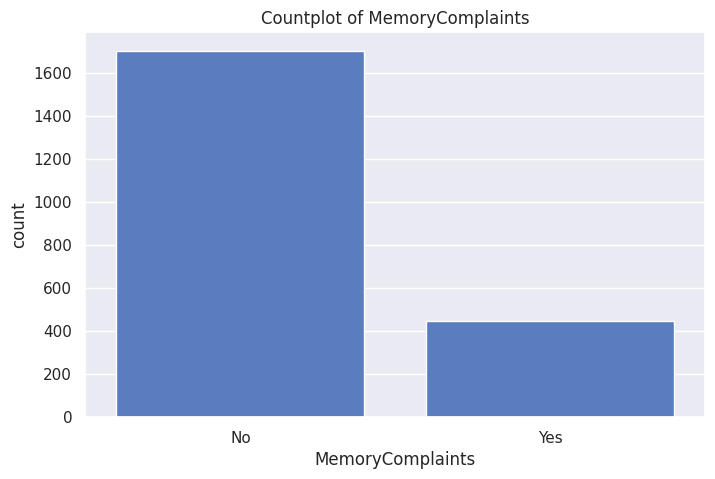

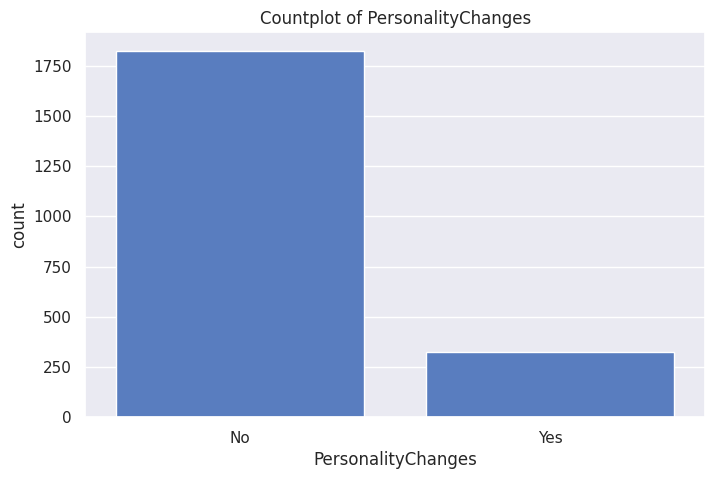

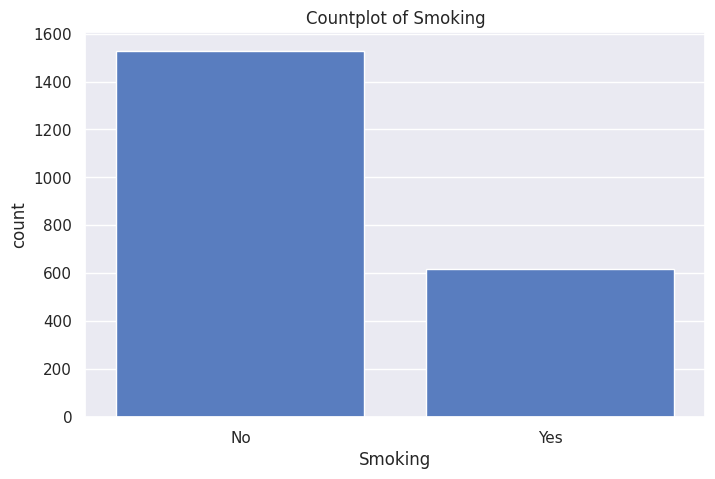

In [101]:
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=alz, x=column)
    plt.title(f'Countplot of {column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

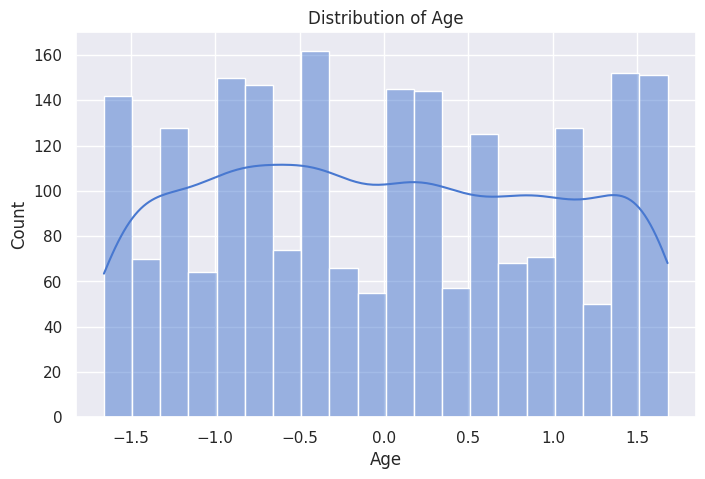

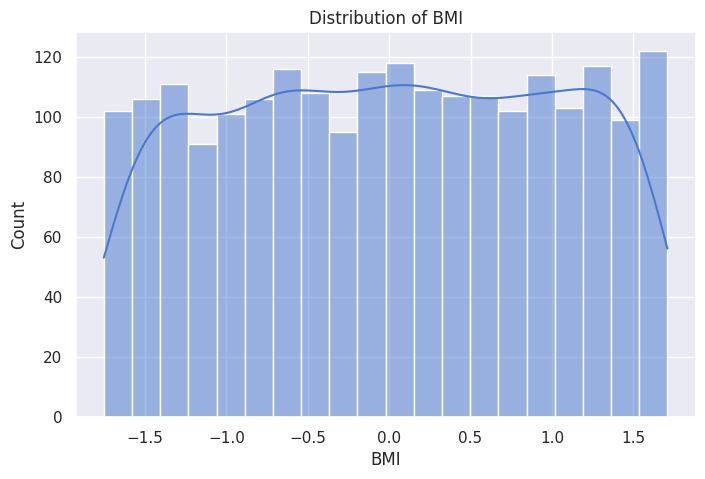

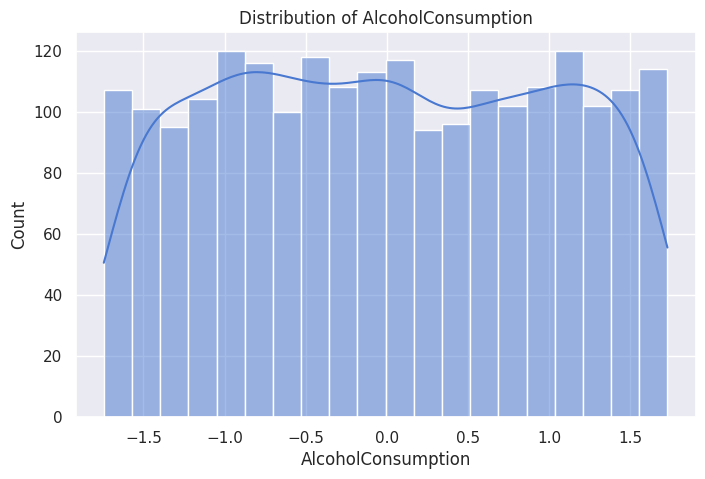

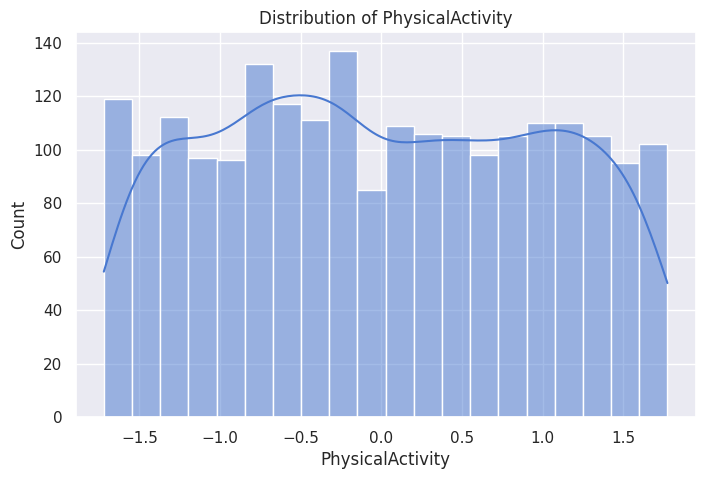

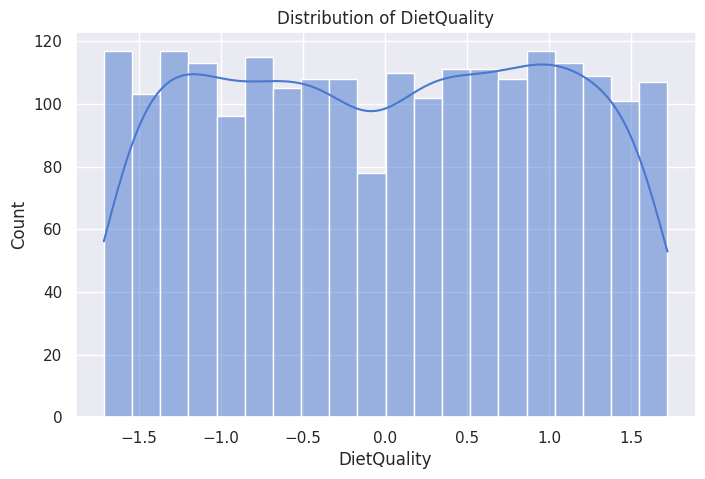

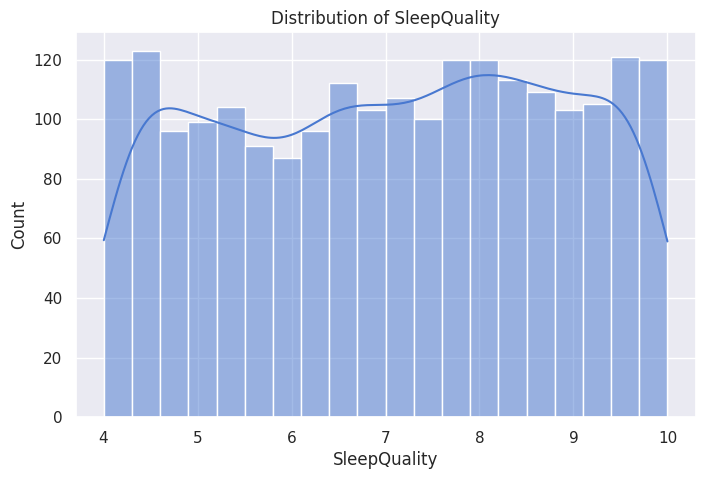

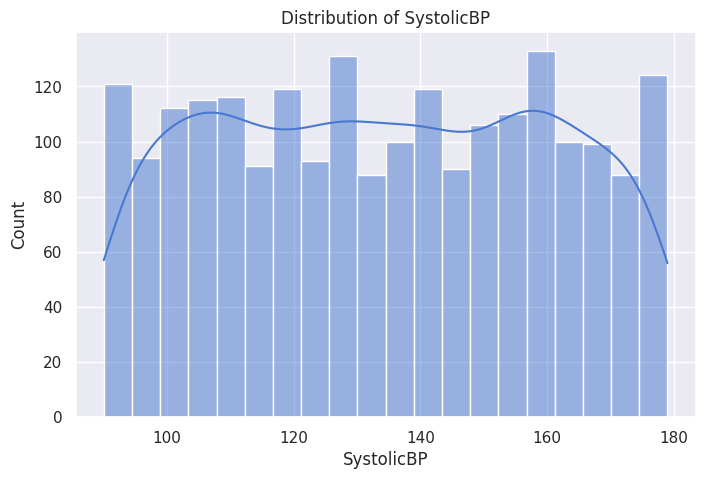

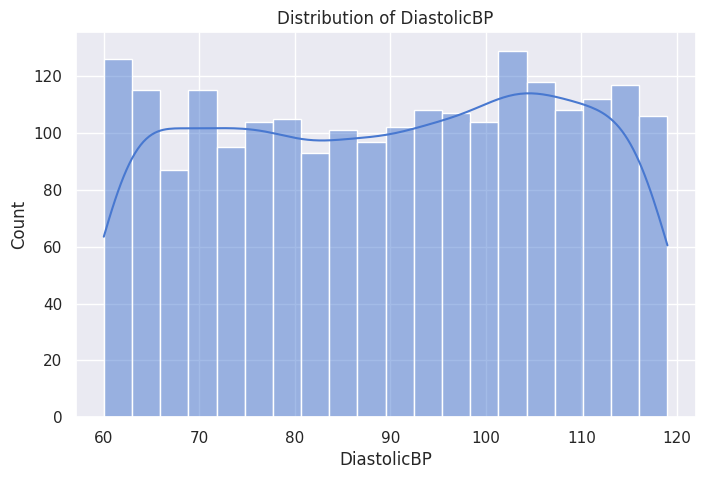

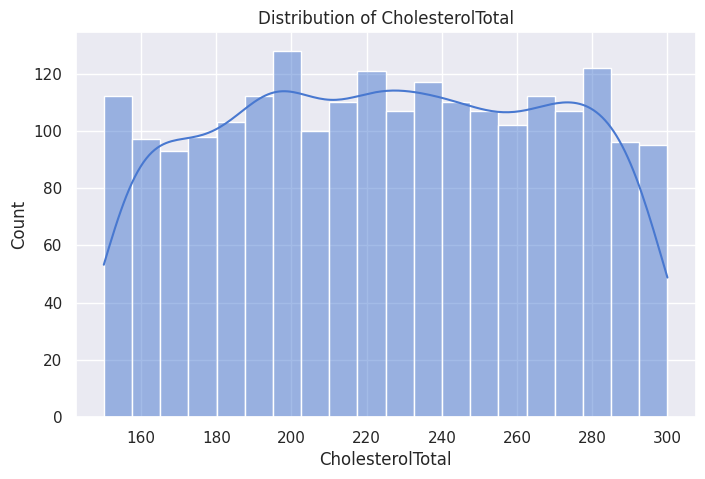

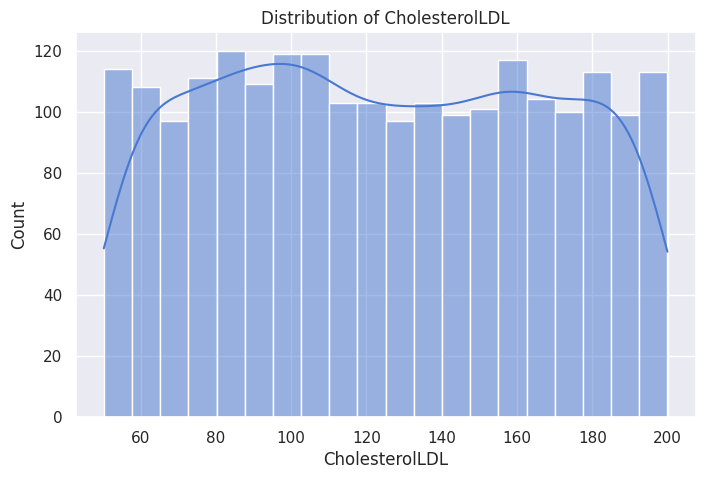

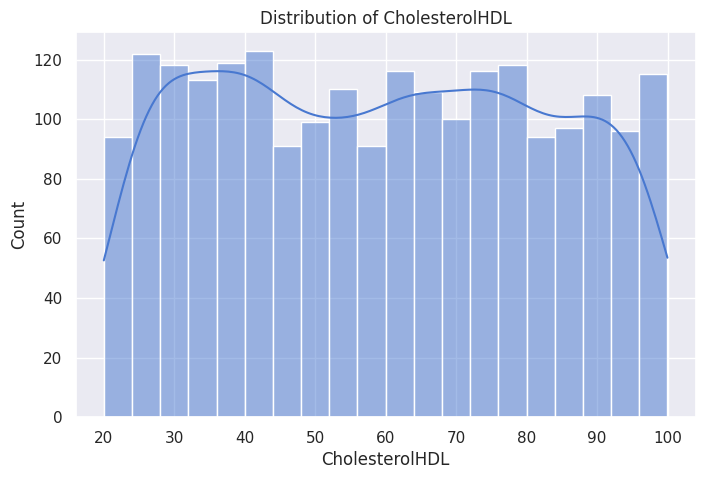

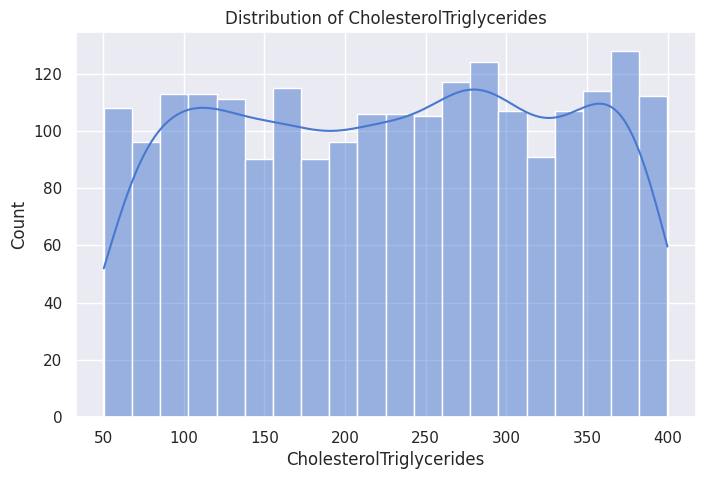

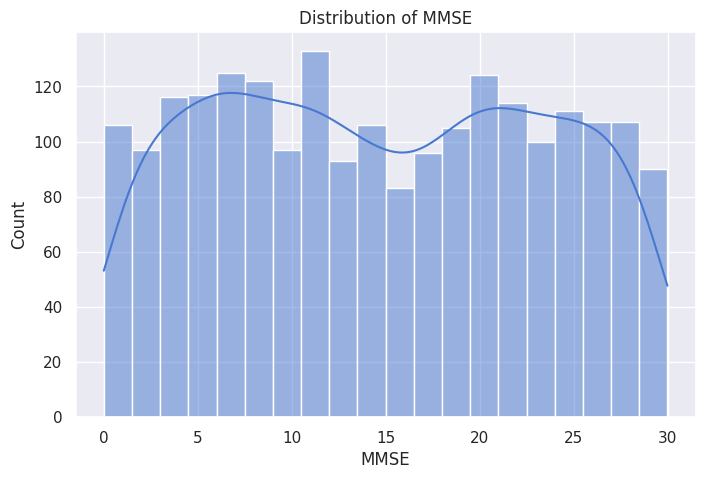

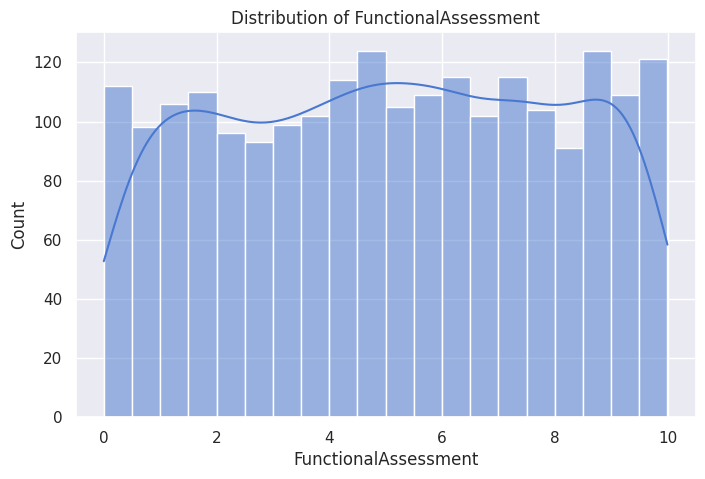

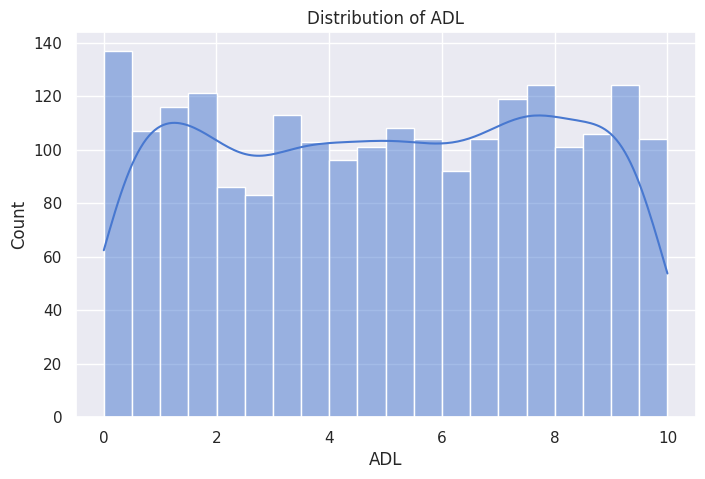

In [102]:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=alz, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

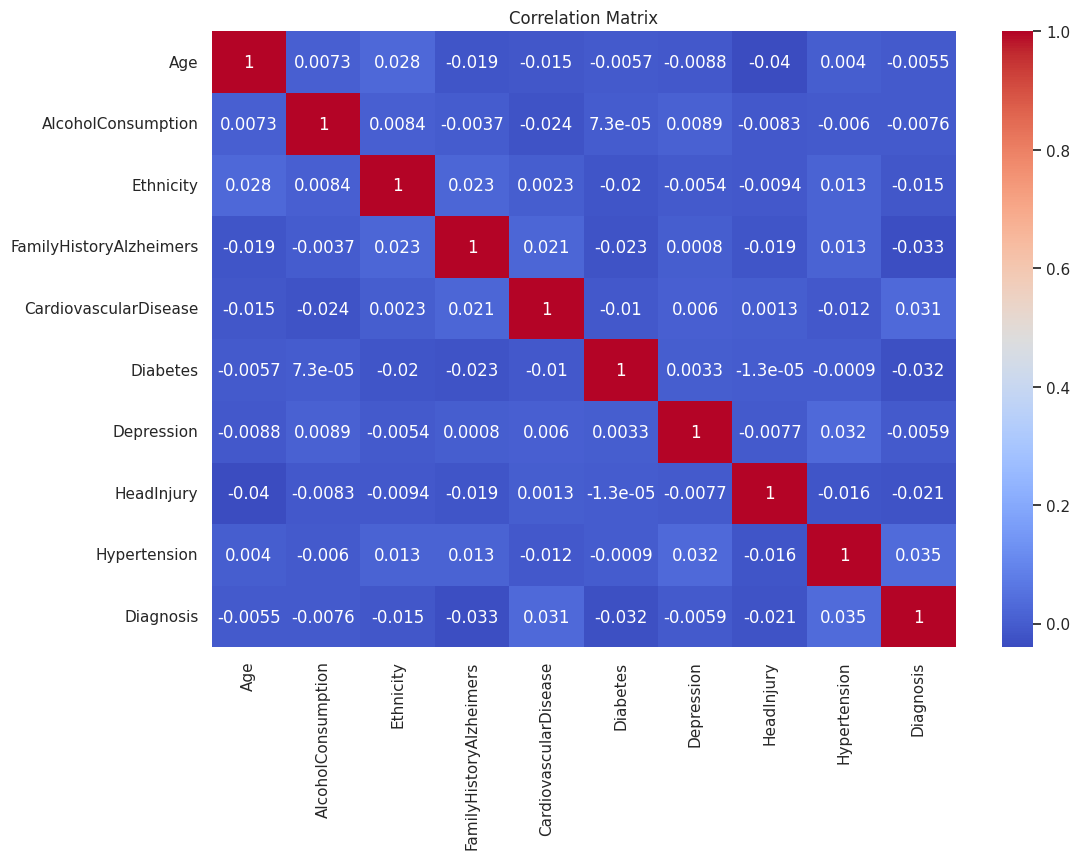

In [103]:
corr_matrix = alz[[*features, target]].corr() # Use unpacking and a single list
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

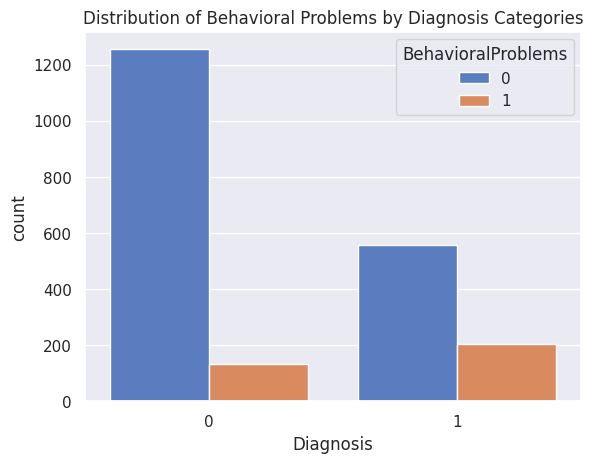

In [106]:
sns.countplot(data=alz, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

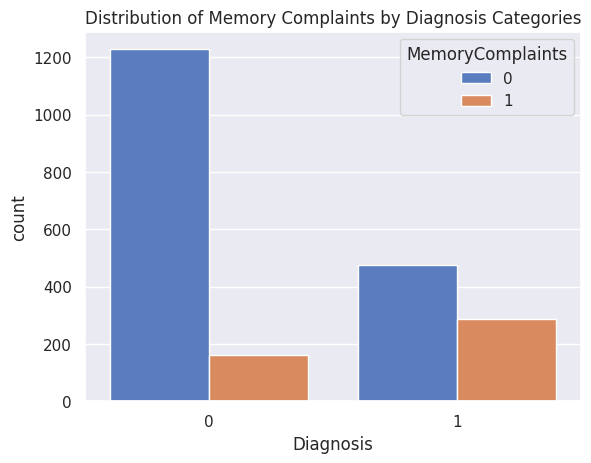

In [108]:
sns.countplot(data=alz, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()